# Laptop Prices Prediction - Machine Learning regression

## Problem Definition

Predict, based on many laptop features, a laptop price.

## Data

This dataset is a collection of features related to various laptops, such as brand, processor type, RAM, storage capacity, and other specifications. The dataset also includes the corresponding prices of these laptops. This dataset can be used for regression analysis to predict the prices of laptops based on their features. The dataset is suitable for data scientists, machine learning enthusiasts, and researchers who are interested in building regression models to predict the prices of laptops based on various features.

The dataset used can be found on Kaggle using the following link: https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset

## Goal

> We aim to achieve an RMSE value as close to zero as possible.

## Evaluation Metric

For the proper evaluation we gonna calculate:

* Root Mean Squared Error (RMSE)
* R-squared (R²) Score
* Mean Absolute Error (MAE)

By using them we'll gain insights into different aspects of model predictions.

## Features

**This is our data dictionary**

1. brand: the laptop's brand [ASUS, DELL, Lenovo, HP, acer]
2. processor_brand: processor's brand [Intel, AMD, M1]
3. processor_name: name of the processor [Core i3, Core i5, Core i7, Ryzen 5, Ryzen 7]
4. processor_gnrtn: the processor generation [Not Available, 7th, 8th, 10th, 11th]
5. ram_gb: ram size [4 GB, 8 GB, 16 GB, 32 GB]
6. ram_type: ram type [DDR4, DDR5, LPDDR3, LPDDR4, LPDDR4X] 
7. ssd: Solid-State Drive -> has or not ssd and if does, storage capacity [0 GB, 128 GB, 256 GB, 512 GB, 1024 GB]
8. hdd: Hard Disk Drive -> has or not ssd and if does, storage capacity [0 GB, 512 GB, 1024 GB, 2048 GB]
9. os: Operating System [Windows, Mac, DOS]
10. os_bit: Operating System bit [32-bit, 62-bit]
11. graphic_card_gb: graphic card size [0 GB, 2 GB, 4 GB, 6 GB, 8 GB]
12. weight: laptop's weight [Casual, ThinNlight, Gaming]
13. warranty: has or not and if does, how much time [No warranty, 1 year, 2 years, 3 years]
14. Touchscreen: has or not [No, Yes]
15. msoffice: MS office present or not [No, Yes]
16. Price: Price (in indian rupee)
17. rating: laptop's rating in stars [1 star, 2 stars, 3 stars, 4 stars, 5 stars]
18. Number of Ratings: number of ratings
19. Number of Reviews: number of reviews

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation. For our models we'll work with the following:

* Random Forest Regressor
* Linear Regression
* XGBoost
* SVR 

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Ignore the notebook warnings
import warnings
warnings.filterwarnings('ignore')

# Models we gonna use
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Model selection
from sklearn.model_selection import train_test_split

# Models tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Load data

In [2]:
df = pd.read_csv('laptopPrice.csv')

## Data exploratory and preprocessing

In [3]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
# There're any missing values?
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

What we can infere at a first glance:

* We have 823 rows in the DataFrame and a total of 19 columns
* We have numeric and non-numerical column types
* No missing values

### Copy the DataFrame

In [6]:
# Make a copy of the original DataFrame to perform edits on
df_copy = df.copy(deep=True)

In [7]:
df_copy.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


As we have few `Number of Ratings` to be used to train our model we gonna **drop** them and the correlate `rating` and `Number of Reviews`

In [8]:
df_copy = df_copy.drop(['rating', 'Number of Ratings', 'Number of Reviews'], axis=1)

df_copy.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990


By reading the features we know that the `processor_gnrtn` feature have some rows with 'Not Available' value which we can consider as NaN value. Let's replace every 'Not Available' value with **NaN** and see how many of these rows we have.

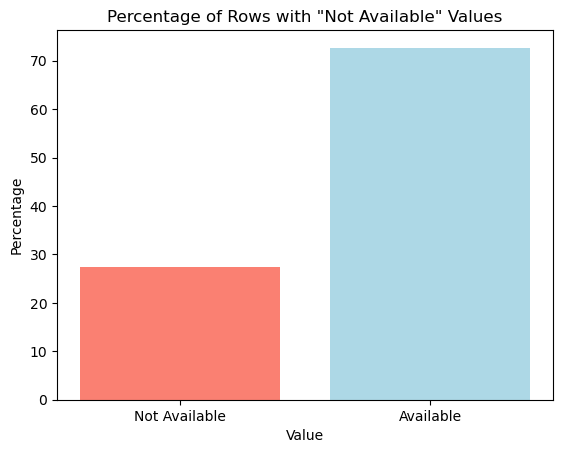

In [9]:
# Replace 'not available' with NaN
df_copy['processor_gnrtn'].replace('Not Available', np.nan, inplace=True)

# Count the number of rows with NaN values in 'processor_gnrtn' column
num_rows_with_na = df_copy['processor_gnrtn'].isnull().sum()

# Get the total number of rows in the DataFrame
total_rows = len(df_copy)

# Calculate the percentage of rows with 'Not Available' values
percentage = (num_rows_with_na / total_rows) * 100

# Calculate the percentage of rows without 'Not Available' values
percentage_without_na = 100 - percentage

# Create a bar plot
labels = ['Not Available', 'Available']
values = [percentage, percentage_without_na]
colors = ['salmon', 'lightblue']

plt.bar(labels, values, color=colors)
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage of Rows with "Not Available" Values')
plt.show()

The processor's generation can impact greatly in a machine's final price. Altought we gonna lose a big number of samples, we gonna choose to drop all the rows with "Not Available" values that we transformed into NaN value.

In [10]:
df_copy.dropna(subset=['processor_gnrtn'], inplace=True)

df_copy.isna().sum()

brand              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
warranty           0
Touchscreen        0
msoffice           0
Price              0
dtype: int64

### Transform all the values into numeric

With the NaN values removed, let's convert all the values in our DataFrame to numeric format so we can start modeling.

In [11]:
from sklearn.preprocessing import LabelEncoder

def convert_string_to_numeric(df_copy):
    le = LabelEncoder()
    for column in df_copy.select_dtypes(include='object'):
        df_copy[column] = le.fit_transform(df_copy[column])
    return df_copy

conv_numeric = convert_string_to_numeric(df_copy)

In [12]:
df_copy.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price
0,1,1,0,0,2,1,0,1,2,1,0,0,3,0,0,34649
1,5,1,0,0,2,1,0,1,2,1,0,0,3,0,0,38999
2,5,1,0,0,2,1,0,1,2,1,0,0,3,0,0,39999
3,1,1,1,0,3,1,6,0,2,0,1,0,3,0,0,69990
7,1,1,1,0,3,1,0,1,2,0,1,0,3,0,0,58799


## Modeling

Split the data in X and y and then in train and test.

In [13]:
# Splitting the data into features (X) and target variable (y)
X = df_copy.drop('Price', axis=1)
y = df_copy['Price'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation

Create the models we previously said we'd work with and fit with the data.

In [14]:
# First create dictionary of models
models = {'Random Forest': RandomForestRegressor(),
          'Linear Regression': LinearRegression(),
          'XGBoost': XGBRegressor(),
          'SVR': SVR()}

# Fit the model to the data
for name, model in models.items():
    model.fit(X_train, y_train)
    
# Define a function to compute our evaluation metrics    
def compute_metrics(model, X_test, y_pred):
    y_pred = model.predict(X_test)
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Compute R-squared score
    r2 = r2_score(y_test, y_pred)
    # Compute MAE
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, r2, mae

# Define a function so we can check later our metrics scores
def metrics_scores(models_dict, X_test, y_test):
    # Create an empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model', 'RMSE', 'R2', 'MAE'])
    # Iterate over the dictionary items
    for name, model in models_dict.items():
        rmse, r2, mae = compute_metrics(model, X_test, y_test)
        # Store metrics in the results DataFrame
        results_df = results_df.append({'Model': name, 'RMSE': rmse, 'R2': r2, 'MAE': mae}, ignore_index=True)
    return results_df

### Model Comparison

We defined a function to compute and store our evaluation metrics, let's call it to see our model's first scores.

In [15]:
# Call our metrics_scores function
metrics_scores(models, X_test, y_test)

,Model,RMSE,R2,MAE
0,Random Forest,39844.581355,0.523595,16998.997811
1,Linear Regression,40966.586155,0.496387,22136.562846
2,XGBoost,41018.197506,0.495117,17593.885742
3,SVR,60346.122413,-0.092789,32651.787641


Based on these metrics, the `Random Forest` model seems to perform the best among the three models on the regression task, as it has the lowest RMSE, highest R2 score, and lowest MAE. 

Let's create a grid of hyperparameters of each of our models to tune them with RandomizedSearchCV. As Linear Regression is a simple and straightforward algorithm that doesn't have hyperparameter to tune, we'll be doing this only with the three other models.

### Create hyperparameters grid

In [16]:
# RandomForest grid
rf_grid = {'n_estimators': [100, 200, 300],
           'max_depth': [None, 5, 10],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],
           'max_features': ['auto', 'sqrt', 'log2']}

# XGBoost grid
xgb_grid = {'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0],
            'gamma': [0, 0.1, 0.2]}

# SVR grid
svr_grid = {'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'epsilon': [0.1, 0.01, 0.001]}

### Tune with RandomizedSearchCV

In [17]:
# Let's write a function so RandomizedSearchCV can tune all at once

def run_random_search(model, param_grid):
    rs = RandomizedSearchCV(model, param_distributions=param_grid, cv=15, n_iter=50, verbose=True)
    rs.fit(X_train, y_train)
    return rs

np.random.seed(42)

# We gonna use rs = RandomSearch
rs_rf = run_random_search(RandomForestRegressor(), rf_grid)
rs_xgb = run_random_search(XGBRegressor(), xgb_grid)
rs_svr = run_random_search(SVR(), svr_grid)

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Fitting 15 folds for each of 50 candidates, totalling 750 fits
Fitting 15 folds for each of 36 candidates, totalling 540 fits


In [18]:
# Let's check the best params

rs_models = {'rs_rf': rs_rf,
             'rs_xgb': rs_xgb,
             'rs_svr': rs_svr}

# Function to look the best params
def best_params_list(models_dict):
    best_params = {}
    for name, model in models_dict.items():
        # Retrieve the best parameters for each model
        best_params[name] = model.best_params_
    return best_params

best_params_list(rs_models)      

{'rs_rf': {'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None},
 'rs_xgb': {'subsample': 1.0,
  'n_estimators': 200,
  'max_depth': 3,
  'learning_rate': 0.1,
  'gamma': 0.2,
  'colsample_bytree': 1.0},
 'rs_svr': {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.001, 'C': 10}}

### rs_models comparison

Call the metrics_score function to compare the scores of the randomized tuned models with the scores before tuning.

In [19]:
# Call our metrics_score function but this time for our rs_models
metrics_scores(rs_models, X_test, y_test)

,Model,RMSE,R2,MAE
0,rs_rf,38715.796064,0.550206,16785.847112
1,rs_xgb,39611.422001,0.529154,17259.919206
2,rs_svr,56143.498204,0.054119,29020.770149


In [20]:
# Previous model scores
metrics_scores(models, X_test, y_test)

,Model,RMSE,R2,MAE
0,Random Forest,39844.581355,0.523595,16998.997811
1,Linear Regression,40966.586155,0.496387,22136.562846
2,XGBoost,41018.197506,0.495117,17593.885742
3,SVR,60346.122413,-0.092789,32651.787641


RandomSearch got improvements on all the models, with RandomForest still being the best untill now. Let's tune them more with GridSearch building param grids around the best metrics we found tuning with RandomizedSearchCV.

### Tune with GridSearchCV

In [21]:
np.random.seed(42)

# RandomForest bigger grid with more hyperparameters
rf_bigger_grid = {'n_estimators': [50, 100, 200],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [None, 5, 10]}

# XGBoost bigger grid with more hyperparameters
xgb_bigger_grid = {'n_estimators': [100, 200, 300],
                   'max_depth': [3, 5, 7],
                   'learning_rate': [0.1, 0.01, 0.001],
                   'gamma': [0, 0.1, 0.2],
                   'colsample_bytree': [0.8, 1.0]}

# SVR
svr_bigger_grid = {'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.5],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'C': [1, 10, 100, 1000]}


# Function to run GridSearch
def run_grid_search(model, param_grid):
    gs = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=True)
    gs.fit(X_train, y_train)
    return gs

In [22]:
%%time
# We gonna use gs = GridSearch
gs_rf = run_grid_search(RandomForestRegressor(), rf_bigger_grid)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Wall time: 2min 4s


In [23]:
%%time
gs_xgb = run_grid_search(XGBRegressor(), xgb_bigger_grid)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Wall time: 1min 21s


In [24]:
%%time
gs_svr = run_grid_search(SVR(), svr_bigger_grid)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Wall time: 8min 53s


In [25]:
# Let's check the best params

gs_models = {'gs_rf': gs_rf,
             'gs_xgb': gs_xgb,
             'gs_svr': gs_svr}

# Function to look the best params
def best_params_list(models_dict):
    best_params = {}
    for name, model in models_dict.items():
        # Retrieve the best parameters for each model
        best_params[name] = model.best_params_
    return best_params

best_params_list(gs_models)      

{'gs_rf': {'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 'gs_xgb': {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 100},
 'gs_svr': {'C': 10, 'epsilon': 0.5, 'gamma': 0.5, 'kernel': 'poly'}}

### gs_models compare

Call the metrics_score function to compare the scores after GridSearchCV tuning with the RandomizedSearchCV tuning scores.

In [26]:
# Call our metrics_score function to see GridSearch models scores
metrics_scores(gs_models, X_test, y_test)

,Model,RMSE,R2,MAE
0,gs_rf,38456.414315,0.556212,16538.369934
1,gs_xgb,39432.840104,0.533390,17446.562142
2,gs_svr,40966.521587,0.496388,17016.650182


In [27]:
# Compare to Randomized models scores
metrics_scores(rs_models, X_test, y_test)

,Model,RMSE,R2,MAE
0,rs_rf,38715.796064,0.550206,16785.847112
1,rs_xgb,39611.422001,0.529154,17259.919206
2,rs_svr,56143.498204,0.054119,29020.770149


All the way to the end, we managed to improve RandomForest model in all the steps and it kept being the best between our models. Let's create the **ideal model** using RandomForest best parameters and give a look on a comparison between the predicted and the real prices.

### Predicted and real prices prediction

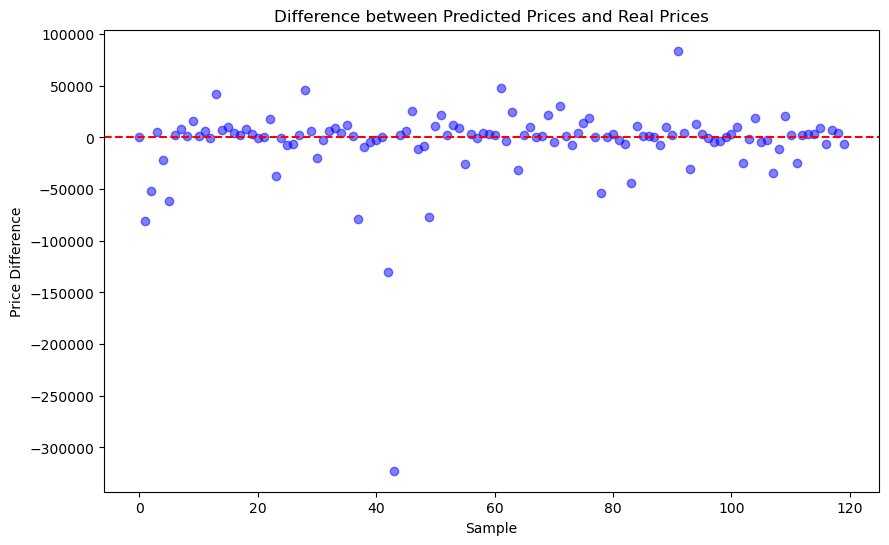

In [28]:
# Create ideal model
ideal_model = RandomForestRegressor(max_depth=None,
                                    max_features='log2',
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    n_estimators=100)

# Fit the model
ideal_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ideal_model.predict(X_test)

# Calculate the difference between predicted and real prices
price_diff = y_pred - y_test

# Plot the difference
plt.figure(figsize=(10, 6))
plt.scatter(range(len(price_diff)), price_diff, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Price Difference')
plt.title('Difference between Predicted Prices and Real Prices')
plt.show()

### Feature Importance

Let's give a quick check at final on the feature importance.

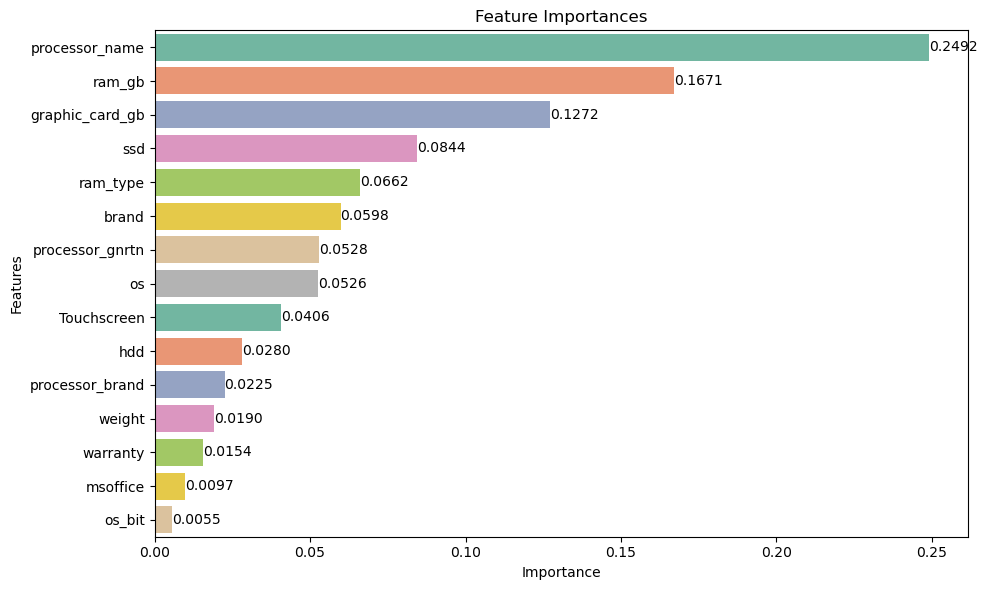

In [29]:

# Get feature importances from the trained model
importances = ideal_model.feature_importances_

# Get the indices of features sorted by importance in descending order
indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='Set2')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")

# Add value labels
for i, v in enumerate(importances[indices]):
    plt.text(v, i, f"{v:.4f}", color='black', va='center')

plt.tight_layout()
plt.show()